In [4]:
import keras
import nets
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.layers import BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

train_dir = './imgs/train'
test_dir = './imgs/test'
val_dir = './imgs/val'

batch_size = 96
img_shape = (128, 128)

def get_datasets():

    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=img_shape,
            batch_size=batch_size,
            class_mode='binary')

    validation_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=img_shape,
            batch_size=batch_size,
            class_mode='binary')

    return  train_generator, validation_generator

In [15]:
model1 = nets.get_model1()
model1_batch_norm = nets.get_model1(batch_norm=True)
model1_droput = nets.get_model1(dropout=True)
model1_drop_batch = nets.get_model1(batch_norm=True, dropout=True)
model2 = nets.get_model2()

In [16]:
train_generator, validation_generator = get_datasets()

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Epoch 1/30
100/100 [==============================] - 331s 3s/step - loss: 0.4192 - acc: 0.8242 - val_loss: 0.6277 - val_acc: 0.7444
Epoch 2/30
100/100 [==============================] - 312s 3s/step - loss: 0.1098 - acc: 0.9597 - val_loss: 0.6320 - val_acc: 0.8049
Epoch 3/30
100/100 [==============================] - 323s 3s/step - loss: 0.0710 - acc: 0.9741 - val_loss: 1.2503 - val_acc: 0.7554
Epoch 4/30
100/100 [==============================] - 345s 3s/step - loss: 0.0501 - acc: 0.9829 - val_loss: 1.1056 - val_acc: 0.7881
Epoch 5/30
100/100 [==============================] - 331s 3s/step - loss: 0.0476 - acc: 0.9821 - val_loss: 0.7303 - val_acc: 0.8174
Epoch 6/30
100/100 [==============================] - 313s 3s/step - loss: 0.0385 - acc: 0.9855 - val_loss: 0.7514 - val_acc: 0.8432
Epoch 7/30
100/100 [==============================] - 334s 3s/step - loss: 0.0258 - acc: 0.9905 - val_loss: 1.6265 - val_acc: 0.7677
Epoch 8/30
100/100 [==============================] - 321s 3s/step - 

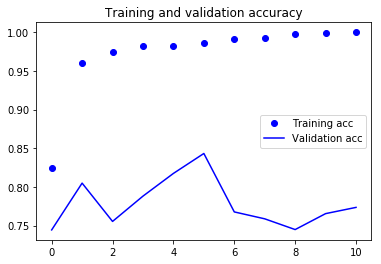

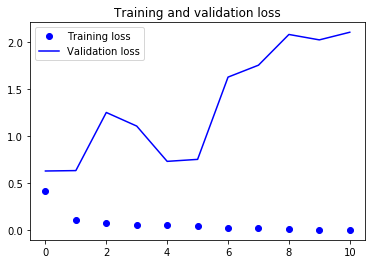

In [17]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model1.h5', monitor='val_loss', save_best_only=True)]

history = model1.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/30
100/100 [==============================] - 356s 4s/step - loss: 0.2209 - acc: 0.9466 - val_loss: 0.6219 - val_acc: 0.8233
Epoch 2/30
100/100 [==============================] - 338s 3s/step - loss: 0.0453 - acc: 0.9836 - val_loss: 3.1539 - val_acc: 0.6760
Epoch 3/30
100/100 [==============================] - 340s 3s/step - loss: 0.0191 - acc: 0.9936 - val_loss: 0.7108 - val_acc: 0.8513
Epoch 4/30
100/100 [==============================] - 333s 3s/step - loss: 0.0406 - acc: 0.9856 - val_loss: 2.2645 - val_acc: 0.6389
Epoch 5/30
100/100 [==============================] - 343s 3s/step - loss: 0.0165 - acc: 0.9955 - val_loss: 3.2019 - val_acc: 0.6689
Epoch 6/30
100/100 [==============================] - 338s 3s/step - loss: 0.0051 - acc: 0.9993 - val_loss: 5.0543 - val_acc: 0.6342
Epoch 7/30
100/100 [==============================] - 338s 3s/step - loss: 0.0145 - acc: 0.9950 - val_loss: 0.5160 - val_acc: 0.8777
Epoch 8/30
100/100 [==============================] - 342s 3s/step - 

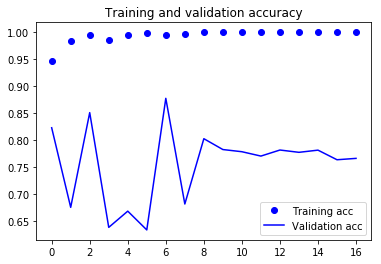

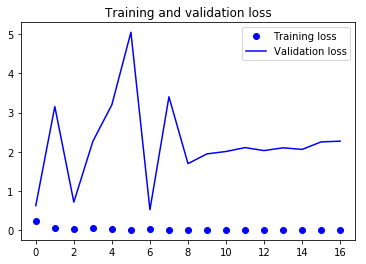

In [18]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model1_batch_norm.h5', monitor='val_loss', save_best_only=True)]

history = model1_batch_norm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/30
100/100 [==============================] - 297s 3s/step - loss: 0.3261 - acc: 0.8576 - val_loss: 0.4380 - val_acc: 0.8194
Epoch 2/30
100/100 [==============================] - 288s 3s/step - loss: 0.1023 - acc: 0.9634 - val_loss: 0.9783 - val_acc: 0.7422
Epoch 3/30
100/100 [==============================] - 289s 3s/step - loss: 0.0671 - acc: 0.9768 - val_loss: 0.6966 - val_acc: 0.7982
Epoch 4/30
100/100 [==============================] - 279s 3s/step - loss: 0.0530 - acc: 0.9812 - val_loss: 1.1340 - val_acc: 0.7357
Epoch 5/30
100/100 [==============================] - 279s 3s/step - loss: 0.0343 - acc: 0.9873 - val_loss: 1.3909 - val_acc: 0.7629
Epoch 6/30
100/100 [==============================] - 280s 3s/step - loss: 0.0249 - acc: 0.9907 - val_loss: 2.0891 - val_acc: 0.7159
Epoch 7/30
100/100 [==============================] - 279s 3s/step - loss: 0.0314 - acc: 0.9884 - val_loss: 1.7282 - val_acc: 0.7103
Epoch 8/30
100/100 [==============================] - 281s 3s/step - 

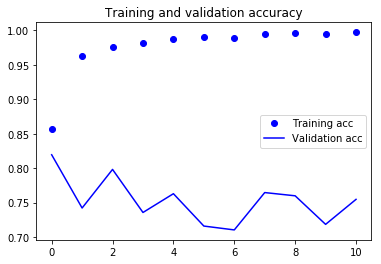

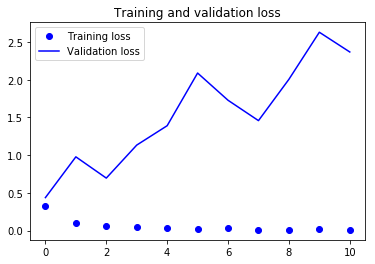

In [19]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model1_droput.h5', monitor='val_loss', save_best_only=True)]

history = model1_droput.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/30
100/100 [==============================] - 322s 3s/step - loss: 0.1463 - acc: 0.9549 - val_loss: 5.7365 - val_acc: 0.6243
Epoch 2/30
100/100 [==============================] - 308s 3s/step - loss: 0.0499 - acc: 0.9818 - val_loss: 1.4786 - val_acc: 0.7529
Epoch 3/30
100/100 [==============================] - 310s 3s/step - loss: 0.0322 - acc: 0.9880 - val_loss: 0.3398 - val_acc: 0.9023
Epoch 4/30
100/100 [==============================] - 310s 3s/step - loss: 0.0272 - acc: 0.9891 - val_loss: 2.7858 - val_acc: 0.6866
Epoch 5/30
100/100 [==============================] - 310s 3s/step - loss: 0.0128 - acc: 0.9958 - val_loss: 1.2757 - val_acc: 0.8134
Epoch 6/30
100/100 [==============================] - 312s 3s/step - loss: 0.0109 - acc: 0.9966 - val_loss: 1.8383 - val_acc: 0.7482
Epoch 7/30
100/100 [==============================] - 311s 3s/step - loss: 0.0082 - acc: 0.9973 - val_loss: 0.7666 - val_acc: 0.8736
Epoch 8/30
100/100 [==============================] - 309s 3s/step - 

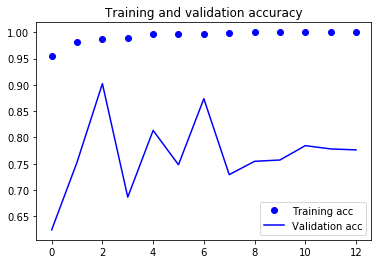

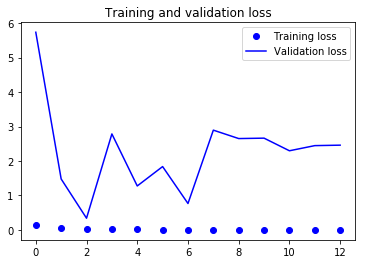

In [20]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model1_drop_batch.h5', monitor='val_loss', save_best_only=True)]

history = model1_drop_batch.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/30
100/100 [==============================] - 306s 3s/step - loss: 0.4630 - acc: 0.7921 - val_loss: 0.3956 - val_acc: 0.8257
Epoch 2/30
100/100 [==============================] - 294s 3s/step - loss: 0.2111 - acc: 0.9111 - val_loss: 0.5484 - val_acc: 0.7491
Epoch 3/30
100/100 [==============================] - 292s 3s/step - loss: 0.1644 - acc: 0.9348 - val_loss: 0.4970 - val_acc: 0.7755
Epoch 4/30
100/100 [==============================] - 296s 3s/step - loss: 0.1192 - acc: 0.9531 - val_loss: 0.7380 - val_acc: 0.7254
Epoch 5/30
100/100 [==============================] - 294s 3s/step - loss: 0.1085 - acc: 0.9585 - val_loss: 0.5505 - val_acc: 0.7807
Epoch 6/30
100/100 [==============================] - 292s 3s/step - loss: 0.0838 - acc: 0.9695 - val_loss: 0.6732 - val_acc: 0.7841
Epoch 7/30
100/100 [==============================] - 291s 3s/step - loss: 0.0780 - acc: 0.9716 - val_loss: 0.6304 - val_acc: 0.7919
Epoch 8/30
100/100 [==============================] - 294s 3s/step - 

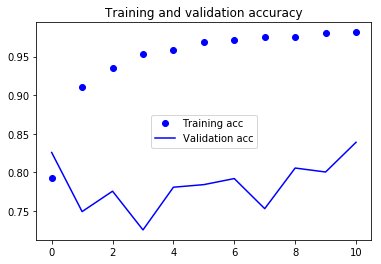

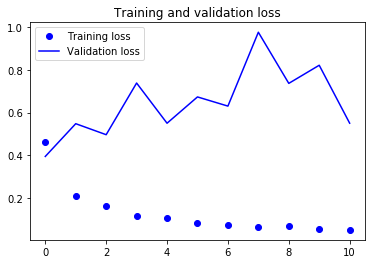

In [21]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model2.h5', monitor='val_loss', save_best_only=True)]

history = model2.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=50)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### CNN koja predstavlja najbolji klasifikator ima sledecu arhitekturu

- Posle svakog conv + max_polling sloja, kojih ima 4, dodata je batch normalizacija
- Deo neuronske mreze koji sluzi za klasifikaciju sastoji se od 2 skrivena sloja, nakon kojih je primenjena dropout regularizacija

In [1]:
from keras.models import load_model

model = load_model('model1_drop_batch.h5')
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 128)       73856     
__________

In [20]:
import itertools
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 8, 6

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [21]:
datagen = ImageDataGenerator(rescale=1./255)

test_set = datagen.flow_from_directory(
            test_dir,
            batch_size=39,
            target_size=(128, 128),
            shuffle=False) 

Found 624 images belonging to 2 classes.


In [22]:
probabilities = model.predict_generator(test_set, 16)

In [23]:
y_true = np.array([0] * 234 + [1] * 390)
y_pred = probabilities > 0.5

Confusion matrix, without normalization
[[207  27]
 [ 34 356]]


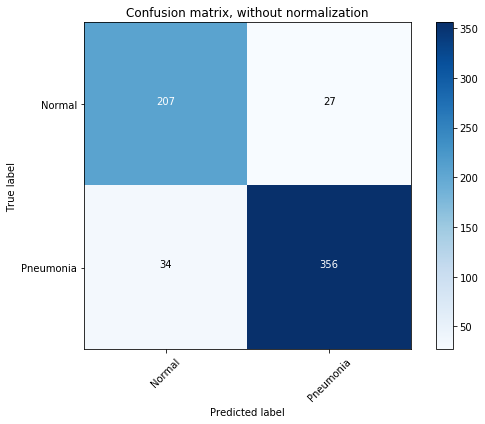

In [24]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_true, y_pred), classes=['Normal', 'Pneumonia'],
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.88 0.12]
 [0.09 0.91]]


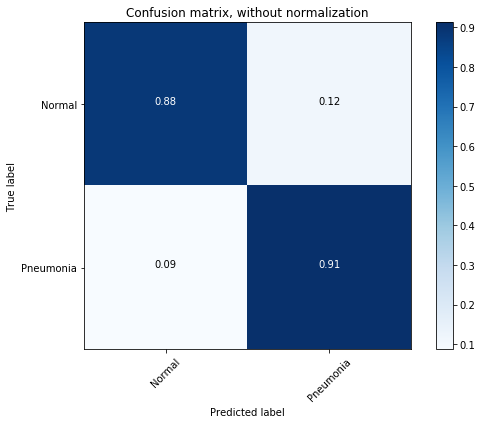

In [25]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_true, y_pred), classes=['Normal', 'Pneumonia'], normalize=True,
                      title='Confusion matrix, without normalization')

Na cm plotu se vidi da model veoma dobar, samo 0.09% snimaka sa pneumonijom je pogresno klasifikovao.

In [26]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1_score = 2*((precision*recall)/(precision+recall))
accuracy = (tp+tn) / (tp+tn+fp+fn)

print("Accuracy of the model is {:.2f}".format((accuracy)))
print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1 Score of the model is {:.2f}".format(f1_score))

Accuracy of the model is 0.90
Recall of the model is 0.91
Precision of the model is 0.93
F1 Score of the model is 0.92


#### Confusion matrix nad validacionim setom podataka

In [27]:
datagen = ImageDataGenerator(rescale=1./255)

validation_set = datagen.flow_from_directory(
            val_dir,
            target_size=(128, 128),
            shuffle=False) 

Found 16 images belonging to 2 classes.


In [28]:
probabilities = model.predict_generator(validation_set, 1)
y_true = np.array([0] * 8 + [1] * 8)
y_pred = probabilities > 0.5

Confusion matrix, without normalization
[[8 0]
 [3 5]]


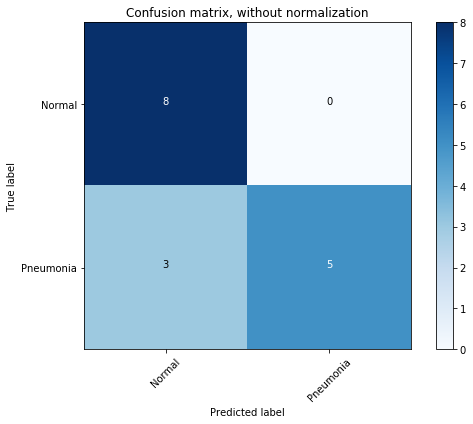

In [29]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_true, y_pred), classes=['Normal', 'Pneumonia'],
                      title='Confusion matrix, without normalization')

Na validacionom setu, model ima nesto losije preformanse. Bez greske je klasifikovao sve normalne snimke, dok je 3/5 snimaka sa pneumonjom pogresno klasifikovao.